Case (a): x_(n+1) = -0.5 * x_n
Equilibrium Point: x = 0
Stability: Stable (|f'(x)| = 0.5)


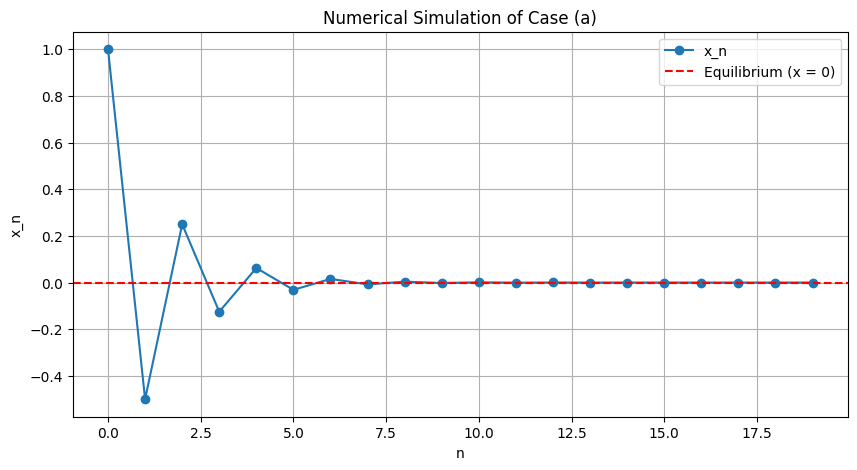

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for case (a)
def f_a(x):
    return -0.5 * x

# Find equilibrium point(s) by solving x = f(x)
# This requires solving x = -0.5 * x, which simplifies to x = 0
equilibrium_a = 0  # x = 0 is the equilibrium point

# Compute the derivative at the equilibrium point
def f_a_prime(x):
    return -0.5

# Evaluate the stability
stability_a = abs(f_a_prime(equilibrium_a))
if stability_a < 1:
    stability_a_result = "Stable"
else:
    stability_a_result = "Unstable"

# Numerical simulation
iterations = 20
x_vals = np.zeros(iterations)
x_vals[0] = 1  # Initial condition

for n in range(1, iterations):
    x_vals[n] = f_a(x_vals[n - 1])

# Display results
print("Case (a): x_(n+1) = -0.5 * x_n")
print(f"Equilibrium Point: x = {equilibrium_a}")
print(f"Stability: {stability_a_result} (|f'(x)| = {stability_a})")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), x_vals, label='x_n', marker='o')
plt.axhline(equilibrium_a, color='red', linestyle='--', label='Equilibrium (x = 0)')
plt.title("Numerical Simulation of Case (a)")
plt.xlabel("n")
plt.ylabel("x_n")
plt.legend()
plt.grid(True)
plt.show()

Case (b): x_(n+1) = x_n^2 - 4
Equilibrium Points and Stability:
x = -1.5615528128088303, Stability: Unstable (|f'(x)| = 3.1231056256176606)
x = 2.5615528128088303, Stability: Unstable (|f'(x)| = 5.123105625617661)


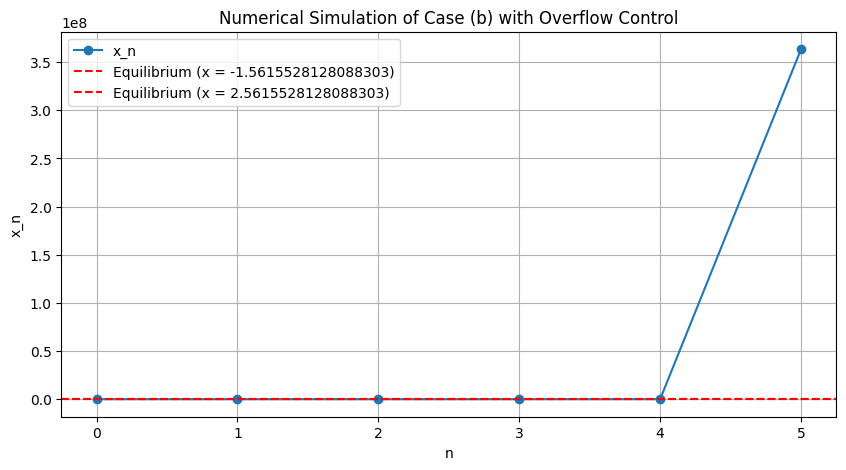

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff

# Define the function for case (b) with overflow control
def f_b(x):
    try:
        return x**2 - 4
    except OverflowError:
        return np.inf  # Return a very large number if overflow occurs

# Symbolic solution to find equilibrium points
x = symbols('x')
equilibrium_points_b = solve(Eq(x, f_b(x)), x)
equilibrium_points_b = [float(p.evalf()) for p in equilibrium_points_b if p.is_real]

# Compute the derivative and check stability for each equilibrium point
stability_results_b = []
f_b_prime = diff(f_b(x), x)
f_b_prime_func = lambda x_val: float(f_b_prime.evalf(subs={x: x_val}))

for point in equilibrium_points_b:
    stability = abs(f_b_prime_func(point))
    stability_status = "Stable" if stability < 1 else "Unstable"
    stability_results_b.append((point, stability_status, stability))

# Display equilibrium points and stability
print("Case (b): x_(n+1) = x_n^2 - 4")
print("Equilibrium Points and Stability:")
for point, stability_status, stability in stability_results_b:
    print(f"x = {point}, Stability: {stability_status} (|f'(x)| = {stability})")

# Numerical simulation with overflow protection
iterations = 20
x_vals_b = np.zeros(iterations)
x_vals_b[0] = 0.1  # Initial condition, slightly away from equilibrium

for n in range(1, iterations):
    x_vals_b[n] = f_b(x_vals_b[n - 1])
    # Check if value is extremely large, in which case we stop to avoid overflow
    if np.isinf(x_vals_b[n]) or abs(x_vals_b[n]) > 1e10:
        x_vals_b[n:] = np.nan  # Fill the rest with NaN to indicate overflow
        break

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), x_vals_b, label='x_n', marker='o')
for point in equilibrium_points_b:
    plt.axhline(point, color='red', linestyle='--', label=f'Equilibrium (x = {point})')
plt.title("Numerical Simulation of Case (b) with Overflow Control")
plt.xlabel("n")
plt.ylabel("x_n")
plt.legend()
plt.grid(True)
plt.show()


Case (c): x_(n+1) = 2x_n / (1 + x_n)
Equilibrium Points and Stability:
x = 0, Stability: Unstable (|f'(x)| = 2.0)
x = 1, Stability: Stable (|f'(x)| = 0.5)


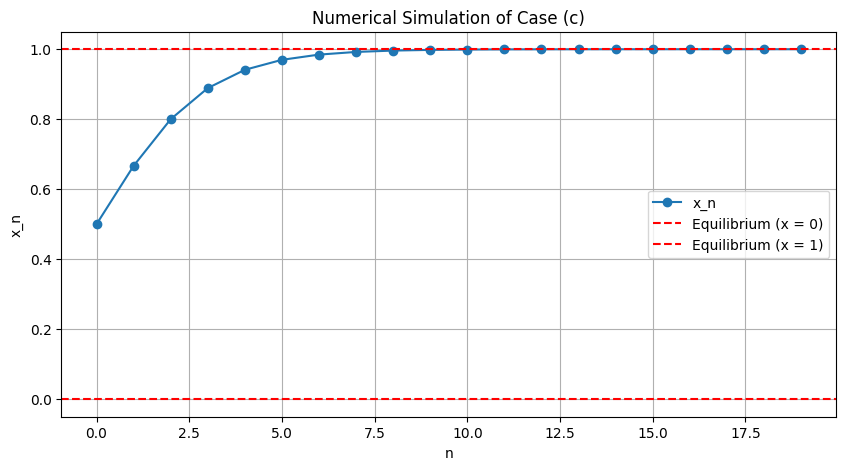

In [7]:
# Define the function for case (c)
def f_c(x):
    return 2 * x / (1 + x)

# Find equilibrium point(s) by solving x = f(x)
# This requires solving x = 2x / (1 + x), which simplifies to x(1 + x) = 2x, or x = 0 or x = 1
equilibrium_points_c = [0, 1]  # x = 0 and x = 1 are the equilibrium points

# Compute the derivative and check stability for each equilibrium point
stability_results_c = []
f_c_prime = diff(f_c(x), x)
f_c_prime_func = lambda x_val: float(f_c_prime.evalf(subs={x: x_val}))

for point in equilibrium_points_c:
    stability = abs(f_c_prime_func(point))
    stability_status = "Stable" if stability < 1 else "Unstable"
    stability_results_c.append((point, stability_status, stability))

# Numerical simulation
x_vals_c = np.zeros(iterations)
x_vals_c[0] = 0.5  # Initial condition

for n in range(1, iterations):
    x_vals_c[n] = f_c(x_vals_c[n - 1])

# Display results
print("Case (c): x_(n+1) = 2x_n / (1 + x_n)")
print("Equilibrium Points and Stability:")
for point, stability_status, stability in stability_results_c:
    print(f"x = {point}, Stability: {stability_status} (|f'(x)| = {stability})")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(iterations), x_vals_c, label='x_n', marker='o')
for point in equilibrium_points_c:
    plt.axhline(point, color='red', linestyle='--', label=f'Equilibrium (x = {point})')
plt.title("Numerical Simulation of Case (c)")
plt.xlabel("n")
plt.ylabel("x_n")
plt.legend()
plt.grid(True)
plt.show()
